In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel(r'C:\Users\admin\Desktop\Projects\Flight Fare Prediction\Data_Train.xlsx')
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
train_data.shape

(10683, 11)

In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10682, 11)

### Exploratory Data Analysis

In [8]:
# Extracting Day and Month from Date_of_Journey column
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [9]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [10]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
# Drop Date_of_Journey
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [12]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month'],
      dtype='object')

In [13]:
# Extract hour and minute from Dep_Time
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [14]:
train_data['Dep_minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [15]:
# Drop Dep_Time
train_data.drop('Dep_Time', axis=1, inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
# Extract hour and minute from Arrival_Time
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
# Drop the Arrival_Time column
train_data.drop('Arrival_Time', axis=1, inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
# Preprocessing the duration column
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+' 0m'
        else:
            duration[i] = '0h '+duration[i]

In [20]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(duration[i].split('h')[0])
    duration_mins.append(duration[i].split('m')[0].split()[-1])

In [21]:
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [22]:
train_data.drop('Duration', axis=1, inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### Handling categorical data

In [24]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

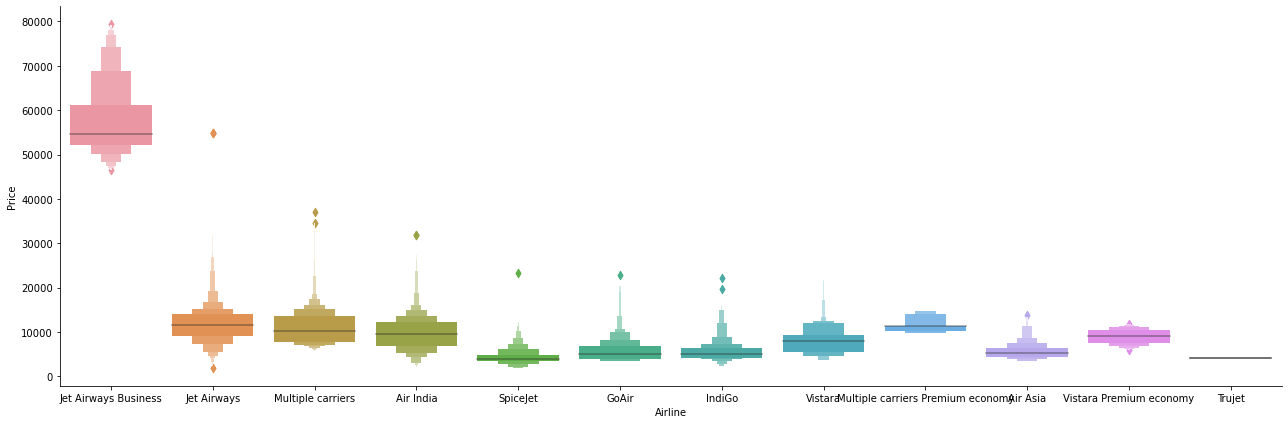

In [25]:
# Plot the graph to check which Airline has highest price
sns.catplot(x='Airline', y='Price', data=train_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [26]:
# Using One Hot Encoding for Airline columns
Airline = pd.get_dummies(train_data['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

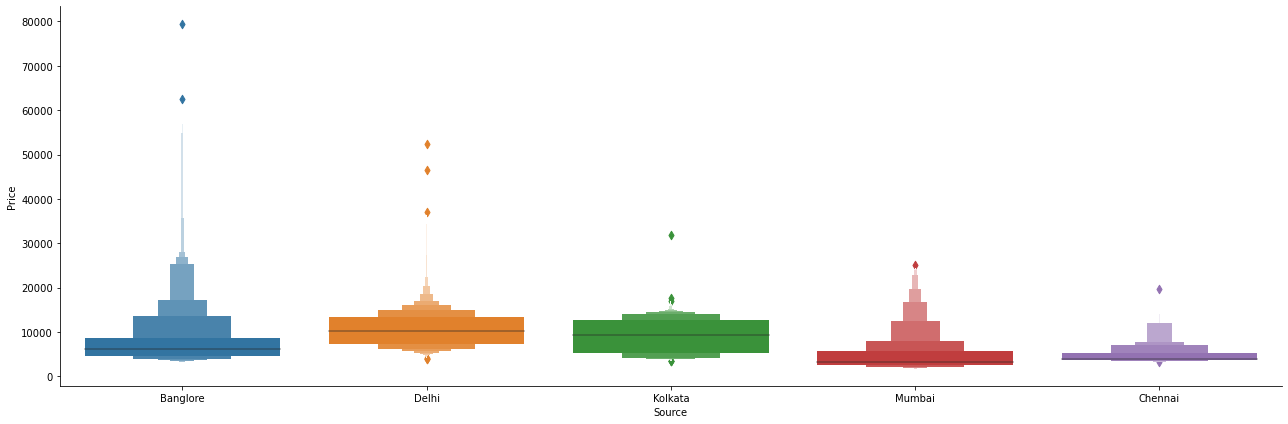

In [28]:
# Plot the graph to check which Source has highest price
sns.catplot(x='Source', y='Price',  data=train_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [29]:
Source = pd.get_dummies(train_data[['Source']], drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
Destination = pd.get_dummies(train_data[['Destination']], drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [33]:
# In Additional_Info column, so much of No info. So we can remove that.
# Route and Total stops are related to each other
train_data.drop(['Additional_Info','Route'], axis=1, inplace=True)

In [34]:
train_data['Total_Stops'].value_counts().sort_values(ascending=True)

4 stops        1
3 stops       45
2 stops     1520
non-stop    3491
1 stop      5625
Name: Total_Stops, dtype: int64

In [35]:
# For Total_Stops use Ordinal Encoding as No. of stops is directly proportional to Price
train_data['Total_Stops'] = train_data['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [36]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [37]:
# Concatenate all the dataset
data_train = pd.concat([train_data,Airline,Source,Destination], axis=1)

In [38]:
data_train.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [39]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.shape

(10682, 30)

## Test Dataset

In [41]:
test_data = pd.read_excel(r'C:\Users\admin\Desktop\Projects\Flight Fare Prediction\Test_set.xlsx')
test_data.shape

(2671, 10)

In [42]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [44]:
Airline = pd.get_dummies(test_data['Airline'], drop_first=True)
Destination = pd.get_dummies(test_data[['Destination']], drop_first=True)
Source = pd.get_dummies(test_data[['Source']], drop_first=True)
test_data.drop(['Airline','Destination','Source','Route','Additional_Info'], axis=1, inplace=True)

In [45]:
test_data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1 stop
1,12/05/2019,06:20,10:20,4h,1 stop
2,21/05/2019,19:15,19:00 22 May,23h 45m,1 stop
3,21/05/2019,08:00,21:00,13h,1 stop
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,non-stop


In [46]:
test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [47]:
test_data.drop('Date_of_Journey', axis=1, inplace=True)

In [48]:
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

In [49]:
test_data.drop('Dep_Time', axis=1, inplace=True)

In [50]:
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [51]:
test_data.drop('Arrival_Time', axis=1, inplace=True)

In [52]:
test_data.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,10h 55m,1 stop,6,6,17,30,4,25
1,4h,1 stop,12,5,6,20,10,20
2,23h 45m,1 stop,21,5,19,15,19,0
3,13h,1 stop,21,5,8,0,21,0
4,2h 50m,non-stop,24,6,23,55,2,45


In [53]:
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+' 0m'
        else:
            duration[i] = '0h '+duration[i]

In [54]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(duration[i].split('h')[0])
    duration_mins.append(duration[i].split('m')[0].split()[-1])

In [55]:
test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins

In [56]:
test_data.drop('Duration', axis=1, inplace=True)

In [57]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,1 stop,6,6,17,30,4,25,10,55
1,1 stop,12,5,6,20,10,20,4,0
2,1 stop,21,5,19,15,19,0,23,45
3,1 stop,21,5,8,0,21,0,13,0
4,non-stop,24,6,23,55,2,45,2,50


In [58]:
test_data['Total_Stops'] = test_data['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [59]:
data_test = pd.concat([test_data,Airline,Source,Destination], axis=1)

In [60]:
data_test.shape

(2671, 28)

In [61]:
data_train.shape

(10682, 30)

In [62]:
col_train = data_train.columns
col_test = data_test.columns

In [63]:
for i in range(len(col_train)):
    if col_train[i] not in col_test:
        print(col_train[i])

Price
Trujet


## Feature Selection

In [64]:
columns = list(data_train.columns)
columns

['Total_Stops',
 'Price',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_minute',
 'Arrival_hour',
 'Arrival_minute',
 'Duration_hours',
 'Duration_mins',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [65]:
columns.remove('Price')

In [66]:
columns

['Total_Stops',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_minute',
 'Arrival_hour',
 'Arrival_minute',
 'Duration_hours',
 'Duration_mins',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [67]:
X = data_train.loc[:,columns]

In [68]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
y = data_train.iloc[:,1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

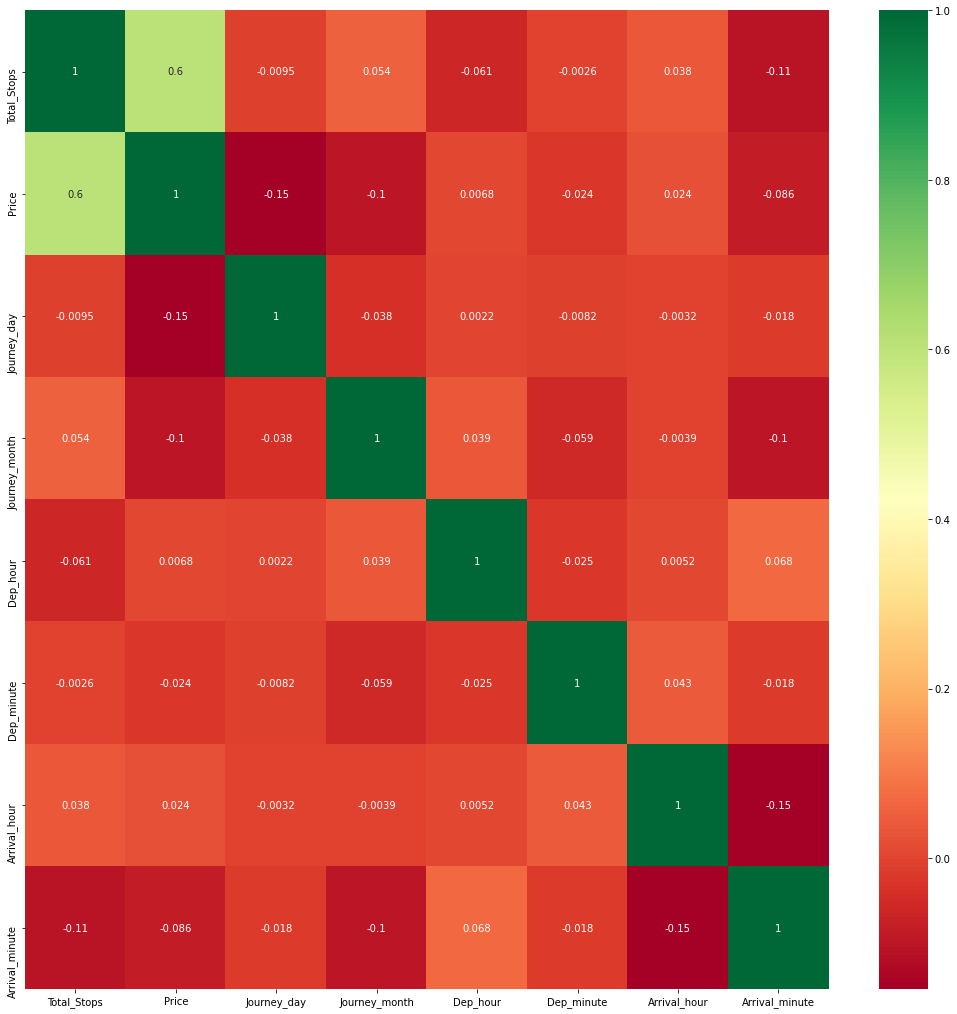

In [70]:
# Finds corelation between Independent features and Dependant features
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [71]:
# Find out important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [72]:
selection.feature_importances_

array([2.17466778e-01, 1.43187935e-01, 5.35704442e-02, 2.49539941e-02,
       2.15309785e-02, 2.81349659e-02, 1.91683216e-02, 1.35455865e-01,
       1.73714420e-02, 9.83374995e-03, 2.12707675e-03, 2.10722342e-02,
       1.34923497e-01, 6.74106252e-02, 1.69295619e-02, 8.87837099e-04,
       3.49234298e-03, 1.11478173e-04, 4.82297424e-03, 8.98095335e-05,
       4.47536662e-04, 8.39169769e-03, 3.44158832e-03, 7.57852483e-03,
       1.32831549e-02, 1.34097894e-02, 5.57024781e-03, 5.16175212e-04,
       2.48193741e-02])

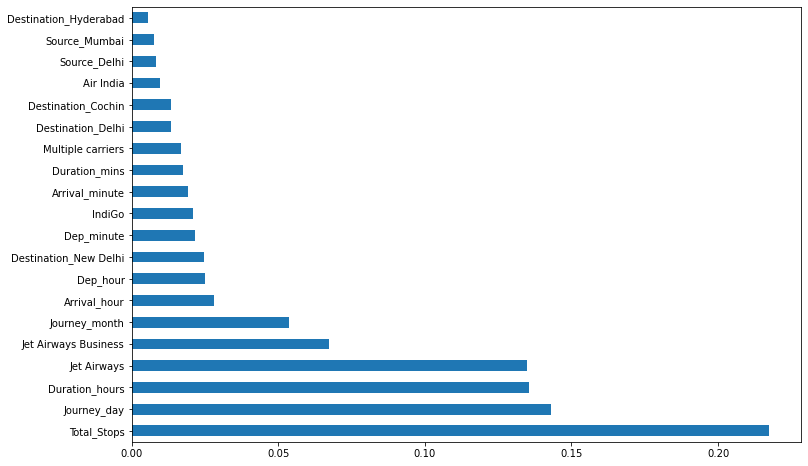

In [73]:
# Plot the graph of feature impotance
plt.figure(figsize=(12,8))
feature_importances = pd.Series(selection.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fit the data using Random Forest

In [74]:
# Train, Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
# Import RandomForest
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [76]:
y_pred = reg_rf.predict(X_test)

In [77]:
reg_rf.score(X_train,y_train)

0.9537523713428662

In [78]:
reg_rf.score(X_test,y_test)

0.7964187164041743

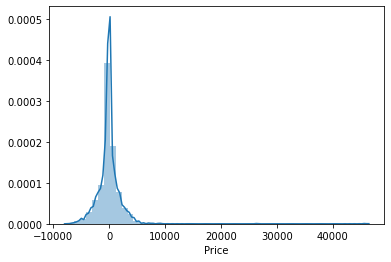

In [79]:
sns.distplot(y_test-y_pred)
plt.show()

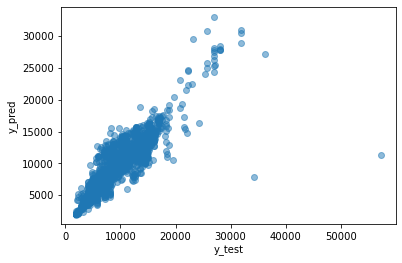

In [80]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [81]:
from sklearn import metrics

In [82]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1182.1587598498184
MSE:  4389631.103438348
RMSE:  2095.144649764867


## Hyper Parameter Tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(y) for y in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [85]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [86]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, 
                          cv=10, verbose=2, random_state=40, n_jobs=1)

In [87]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.1s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.2s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.0s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=400, min_samples_split=2,

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=  12.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=  12.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=  12.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=  11.9s
[CV] n_estimators=1000, min_samples

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.0min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [89]:
prediction = rf_random.predict(X_test)

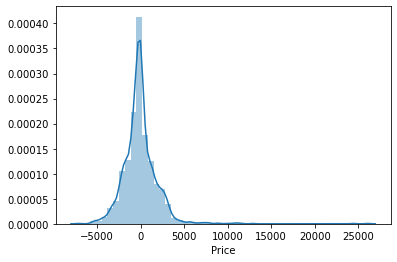

In [90]:
sns.distplot(y_test-prediction)
plt.show()

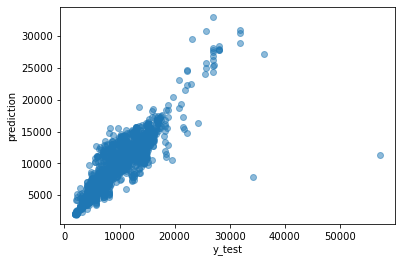

In [91]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [92]:
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  1295.4926494951935
MSE:  3940362.2076985007
RMSE:  1985.0345608322543


## Save the model to reuse it again

In [93]:
import pickle
file = open('file_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [94]:
model = open('file_rf.pkl', 'rb')
random_forest = pickle.load(model)

In [95]:
y_prediction = random_forest.predict(X_test)

In [96]:
metrics.r2_score(y_test,y_prediction)

0.817254804066018